# Introduction to Customer Segmentation in Python

## Task 3: Principal Component Analysis
Let's go over some PCA theory, and see how it works!

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [3]:
df = pd.read_csv('data_processed.csv', index_col=0)

In [4]:
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [5]:
data = df[features]

In [7]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:, 0].std()

1.0

In [14]:
np.save('training_data.npy', data)

In [11]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)

In [34]:
pca.explained_variance_

array([2.65099857, 1.70646229])

In [17]:
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [18]:
features.index('Grocery')

2

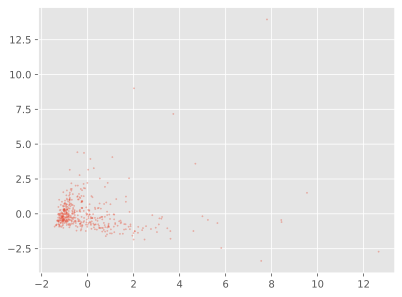

In [24]:
plt.scatter(res_pca[:,0], res_pca[:,1], s=2, alpha = 0.3)

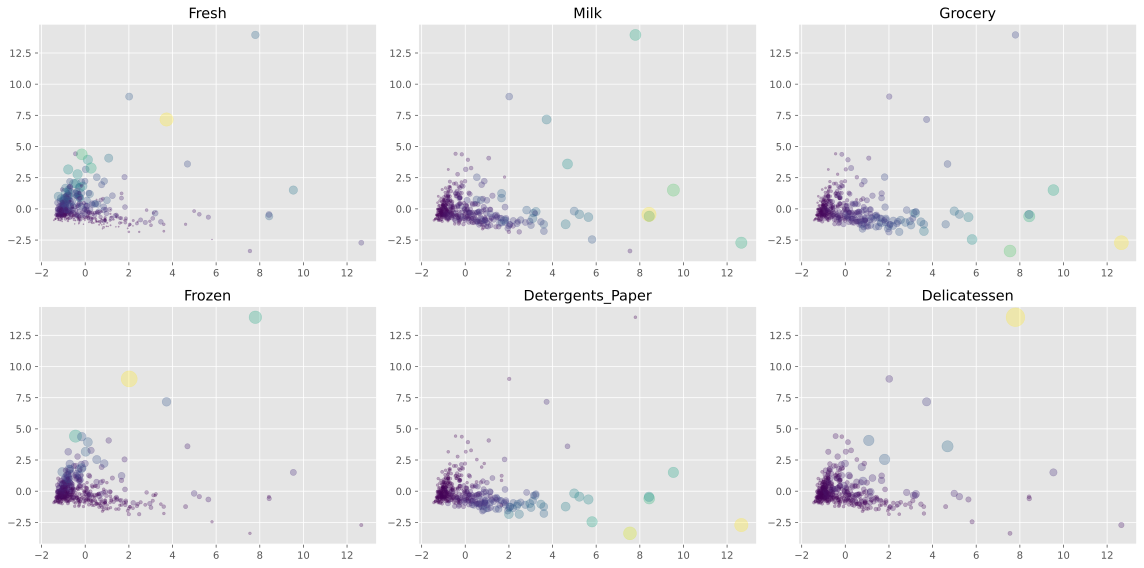

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]# here we want each size hof scatter plot the size of its magnitude 
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()
# here size we are using normalize form after doing standardization 

/var/folders/v2/qf5dz3_96vlfbns8vfzjc0680000gn/T/ipykernel_32381/2527789977.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(res_pca[df[feature]==unique_val, 0],


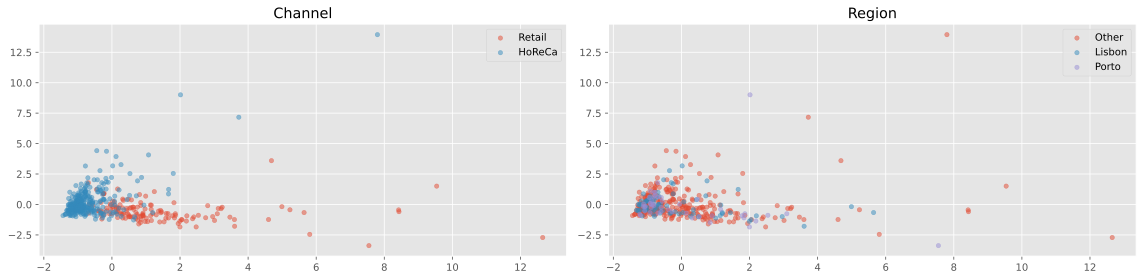

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'virdis'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_pca[df[feature]==unique_val, 0],
                   res_pca[df[feature]==unique_val, 1],
                   s=20, alpha=0.5, cmap = 'Pastel1', label = unique_val)
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

In [36]:
df[feature].unique()

array(['Other', 'Lisbon', 'Porto'], dtype=object)